C:\Users\pc\AppData\Local\Temp\ipykernel_5080\472104512.py:18: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  brent_df = pd.read_csv(


ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29
Stationary


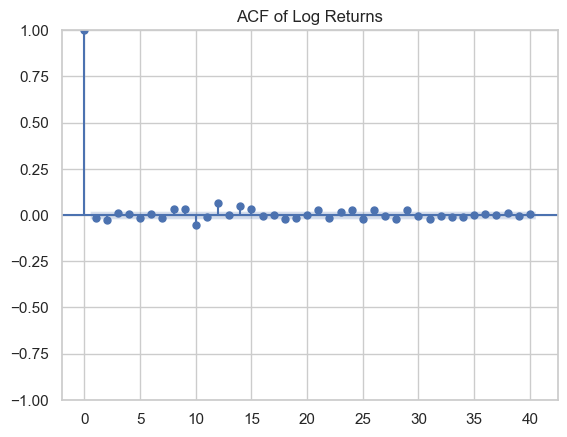

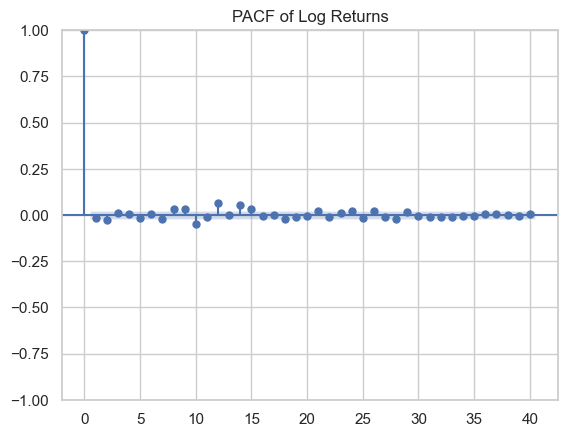

c:\Users\pc\Desktop\10 Academy\Week 10\Brentoil\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\pc\Desktop\10 Academy\Week 10\Brentoil\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\pc\Desktop\10 Academy\Week 10\Brentoil\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              LogReturn   No. Observations:                 9010
Model:                 ARIMA(1, 0, 1)   Log Likelihood               20264.162
Date:                Thu, 07 Aug 2025   AIC                         -40520.324
Time:                        12:44:11   BIC                         -40491.900
Sample:                             0   HQIC                        -40510.653
                               - 9010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.624      0.533      -0.000       0.001
ar.L1          0.1343      0.359      0.374      0.709      -0.570       0.839
ma.L1         -0.1483      0.359     -0.413      0.6

c:\Users\pc\Desktop\10 Academy\Week 10\Brentoil\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\pc\Desktop\10 Academy\Week 10\Brentoil\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


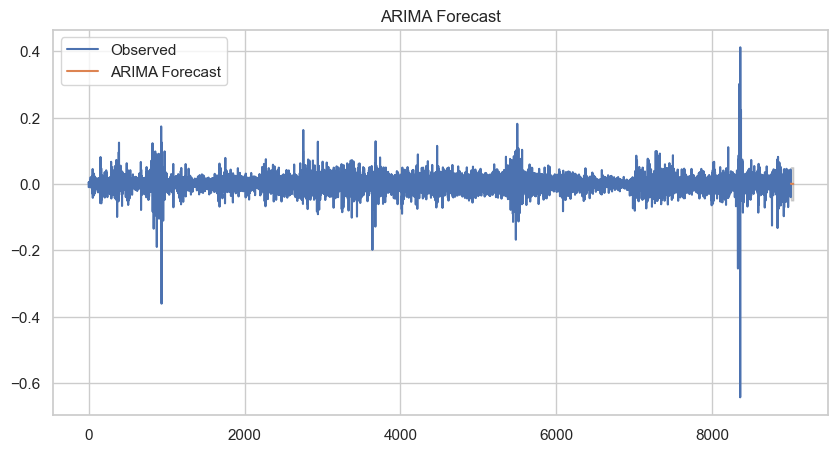

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              LogReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -19284.7
Distribution:                  Normal   AIC:                           38577.3
Method:            Maximum Likelihood   BIC:                           38605.8
                                        No. Observations:                 9010
Date:                Thu, Aug 07 2025   Df Residuals:                     9009
Time:                        12:44:11   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0427  1.939e-02      2.204  2.750e-02 [4.

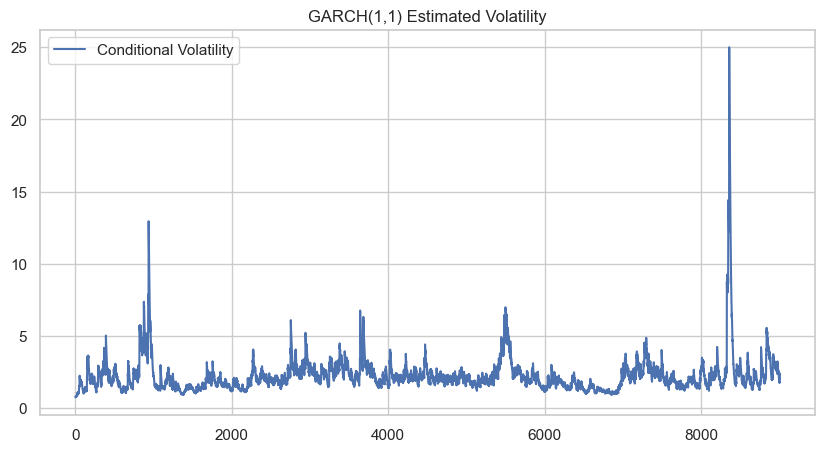

In [7]:
# ==============================
# 1. Imports and Configuration
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import seaborn as sns

sns.set(style="whitegrid")

# ==============================
# 2. Load Data
# ==============================
brent_df = pd.read_csv(
    "../data/brent_prices.csv",
    parse_dates=["Date"],
    date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y', errors='coerce')
)
brent_df = brent_df.sort_values("Date")
brent_df['LogReturn'] = np.log(brent_df['Price']).diff()
log_returns = brent_df['LogReturn'].dropna()

# ==============================
# 3. Stationarity Test
# ==============================
adf_result = adfuller(log_returns)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Stationary" if adf_result[1] < 0.05 else "Non-stationary")

# ==============================
# 4. Plot ACF & PACF
# ==============================
plot_acf(log_returns, lags=40)
plt.title("ACF of Log Returns")
plt.show()

plot_pacf(log_returns, lags=40)
plt.title("PACF of Log Returns")
plt.show()

# ==============================
# 5. ARIMA Model
# ==============================
# Based on ACF/PACF and AIC/BIC, you can fine-tune (p,d,q)
model_arima = ARIMA(log_returns, order=(1, 0, 1))
result_arima = model_arima.fit()
print(result_arima.summary())

# Plot forecast
forecast_steps = 30
forecast = result_arima.get_forecast(steps=forecast_steps)
conf_int = forecast.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(log_returns.index, log_returns, label="Observed")
plt.plot(
    np.arange(len(log_returns), len(log_returns) + forecast_steps),
    forecast.predicted_mean, label="ARIMA Forecast"
)
plt.fill_between(
    np.arange(len(log_returns), len(log_returns) + forecast_steps),
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color="gray", alpha=0.3
)
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

# ==============================
# 6. GARCH Model (Volatility Modeling)
# ==============================
# GARCH(1,1) on log returns
garch_model = arch_model(log_returns * 100, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')
print(garch_result.summary())

# Plot conditional volatility
plt.figure(figsize=(10, 5))
plt.plot(garch_result.conditional_volatility, label="Conditional Volatility")
plt.title("GARCH(1,1) Estimated Volatility")
plt.legend()
plt.show()
